In [90]:
januari = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-01-02' AND '2016-01-03'"

februari = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-02-06' AND '2016-02-26'"

maart = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-03-05' AND '2016-03-18'"

april = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-04-10' AND '2016-04-15'"

mei = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-05-07' AND '2016-05-31'"

juni = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-06-01' AND '2016-06-30'"

juli = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-07-01' AND '2016-07-31'"

augustus = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-08-01' AND '2016-08-31'"

september = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-09-01' AND '2016-09-30'"

oktober = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-10-01' AND '2016-10-31'"

november = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-11-01' AND '2016-11-30'"

december = "SELECT `job_title` FROM `vacatures` WHERE `date_added` BETWEEN '2016-12-01' AND '2016-12-31'"

In [121]:
import pymysql.cursors
connection = pymysql.connect(host = '127.0.0.1',
                             user = 'Alexander',
                             password = 'root',
                             db = 'vacaturesite')
try:
    with connection.cursor() as cursor:
        cursor.execute(januari)
        januari_execute = cursor.fetchall()
        print("Januari gelukt")
    with connection.cursor() as cursor:
        cursor.execute(februari)
        februari_execute = cursor.fetchall()
        print("Februari gelukt")
    with connection.cursor() as cursor:
        cursor.execute(maart)
        maart_execute = cursor.fetchall()
        print("Maart gelukt")
    with connection.cursor() as cursor:
        cursor.execute(april)
        april_execute = cursor.fetchall()
        print("April gelukt")
    with connection.cursor() as cursor:
        cursor.execute(mei)
        mei_execute = cursor.fetchall()
        print("Mei gelukt")
    with connection.cursor() as cursor:
        cursor.execute(juni)
        juni_execute = cursor.fetchall()
        print("Juni gelukt")
    with connection.cursor() as cursor:
        cursor.execute(juli)
        juli_execute = cursor.fetchall()
        print("Juli gelukt")
    with connection.cursor() as cursor:
        cursor.execute(augustus)
        augustus_execute = cursor.fetchall()
        print("Augustus gelukt")
    with connection.cursor() as cursor:
        cursor.execute(september)
        september_execute = cursor.fetchall()
        print("September gelukt")
    with connection.cursor() as cursor:
        cursor.execute(oktober)
        oktober_execute = cursor.fetchall()
        print("Oktober gelukt")
    with connection.cursor() as cursor:
        cursor.execute(november)
        november_execute = cursor.fetchall()
        print("November gelukt")
    with connection.cursor() as cursor:
        cursor.execute(december)
        december_execute = cursor.fetchall()
        print("December gelukt")
finally:
    connection.close()

Januari gelukt
Februari gelukt
Maart gelukt
April gelukt
Mei gelukt
Juni gelukt
Juli gelukt
Augustus gelukt
September gelukt
Oktober gelukt
November gelukt
December gelukt


In [3]:
import pprint
import json
import string
import re
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
import nltk as nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from part_of_speech import get_part_of_speech

In [122]:
remove_punctuations = str.maketrans('', '', string.punctuation)
remove_digits = str.maketrans('', '', string.digits)
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
januari_titles = []
februari_titles = []
maart_titles = []
april_titles = []
mei_titles = []
juni_titles = []
juli_titles = []
augustus_titles = []
september_titles = []
oktober_titles = []
november_titles = []
december_titles = []

# Januari
for title_jan in januari_execute:
    titels_jan = "".join(title_jan).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_jan = word_tokenize(titels_jan)
    januari_titles.append(tokenized_jan)
# Februari
for title_feb in februari_execute:
    titels_feb = "".join(title_feb).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_feb = word_tokenize(titels_feb)
    februari_titles.append(tokenized_feb)
# Maart
for title_mrt in maart_execute:
    titels_mrt = "".join(title_mrt).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_mrt = word_tokenize(titels_mrt)
    maart_titles.append(tokenized_mrt)
# April
for title_apr in april_execute:
    titels_apr = "".join(title_apr).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_apr = word_tokenize(titels_apr)
    april_titles.append(tokenized_apr)
# Mei 
for title_mei in mei_execute:
    titels_mei = "".join(title_mei).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_mei = word_tokenize(titels_mei)
    mei_titles.append(tokenized_mei)
# Juni 
for title_jun in juni_execute:
    titels_jun = "".join(title_jun).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_jun = word_tokenize(titels_jun)
    juni_titles.append(tokenized_jun)
# Juli 
for title_jul in juli_execute:
    titels_jul = "".join(title_jul).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_jul = word_tokenize(titels_jul)
    juli_titles.append(tokenized_jul)
# Augustus
for title_aug in augustus_execute:
    titels_aug = "".join(title_aug).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_aug = word_tokenize(titels_aug)
    augustus_titles.append(tokenized_aug) 
# September 
for title_sep in september_execute:
    titels_sep = "".join(title_sep).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_sep = word_tokenize(titels_sep)
    september_titles.append(tokenized_sep)
# Oktober
for title_okt in oktober_execute:
    titels_okt = "".join(title_okt).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_okt = word_tokenize(titels_okt)
    oktober_titles.append(tokenized_okt) 
# November 
for title_nov in november_execute:
    titels_nov = "".join(title_nov).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_nov = word_tokenize(titels_nov)
    november_titles.append(tokenized_nov)
# December 
for title_dec in december_execute:
    titels_dec = "".join(title_dec).lower().translate(remove_punctuations).translate(remove_digits)
    tokenized_dec = word_tokenize(titels_dec)
    december_titles.append(tokenized_dec)

In [123]:
jan_goed = []
feb_goed = []
mrt_goed = []
apr_goed = []
mei_goed = []
jun_goed = []
jul_goed = []
aug_goed = []
sep_goed = []
okt_goed = []
nov_goed = []
dec_goed = []

def removelist_jan(jan):
    for i in jan:
        if type(i) == list:
            removelist_jan(i)
        else:
            jan_goed.append(i)
def removelist_feb(feb):
    for i in feb:
        if type(i) == list:
            removelist_feb(i)
        else:
            feb_goed.append(i)
def removelist_mrt(mrt):
    for i in mrt:
        if type(i) == list:
            removelist_mrt(i)
        else:
            mrt_goed.append(i)
def removelist_apr(apr):
    for i in apr:
        if type(i) == list:
            removelist_apr(i)
        else:
            apr_goed.append(i)
def removelist_mei(mei):
    for i in mei:
        if type(i) == list:
            removelist_mei(i)
        else:
            mei_goed.append(i)
def removelist_jun(jun):
    for i in jun:
        if type(i) == list:
            removelist_jun(i)
        else:
            jun_goed.append(i)
def removelist_jul(jul):
    for i in jul:
        if type(i) == list:
            removelist_jul(i)
        else:
            jul_goed.append(i)
def removelist_aug(aug):
    for i in aug:
        if type(i) == list:
            removelist_aug(i)
        else:
            aug_goed.append(i)
def removelist_sep(sep):
    for i in sep:
        if type(i) == list:
            removelist_sep(i)
        else:
            sep_goed.append(i)
def removelist_okt(okt):
    for i in okt:
        if type(i) == list:
            removelist_okt(i)
        else:
            okt_goed.append(i)
def removelist_nov(nov):
    for i in nov:
        if type(i) == list:
            removelist_nov(i)
        else:
            nov_goed.append(i)
def removelist_dec(dec):
    for i in dec:
        if type(i) == list:
            removelist_dec(i)
        else:
            dec_goed.append(i)

removelist_jan(januari_titles)
removelist_feb(februari_titles)
removelist_mrt(maart_titles)
removelist_apr(april_titles)
removelist_mei(mei_titles)
removelist_jun(juni_titles)
removelist_jul(juli_titles)
removelist_aug(augustus_titles)
removelist_sep(september_titles)
removelist_okt(oktober_titles)
removelist_nov(november_titles)
removelist_dec(december_titles)

In [129]:
jan_frontend = 0
jan_backend = 0
jan_productowner = 0
jan_cloud_security = 0

feb_frontend = 0
feb_backend = 0
feb_productowner = 0
feb_cloud_security = 0

mrt_frontend = 0
mrt_backend = 0
mrt_productowner = 0
mrt_cloud_security = 0

apr_frontend = 0
apr_backend = 0
apr_productowner = 0
apr_cloud_security = 0

mei_frontend = 0
mei_backend = 0
mei_productowner = 0
mei_cloud_security = 0

jun_frontend = 0
jun_backend = 0
jun_productowner = 0
jun_cloud_security = 0

jul_frontend = 0
jul_backend = 0
jul_productowner = 0
jul_cloud_security = 0

aug_frontend = 0
aug_backend = 0
aug_productowner = 0
aug_cloud_security = 0

sep_frontend = 0
sep_backend = 0
sep_productowner = 0
sep_cloud_security = 0

okt_frontend = 0
okt_backend = 0
okt_productowner = 0
okt_cloud_security = 0

nov_frontend = 0
nov_backend = 0
nov_productowner = 0
nov_cloud_security = 0

dec_frontend = 0
dec_backend = 0
dec_productowner = 0
dec_cloud_security = 0
# Januari
for word in jan_goed:
    if word == "frontend":
        jan_frontend += 1
    elif word == "webdeveloper":
        jan_frontend += 1
    elif word == "backend":
        jan_backend += 1
    elif word == "business":
        jan_productowner += 1
    elif word == "cloud":
        jan_cloud_security += 1
    elif word == "security":
        jan_cloud_security += 1
# Februari
for word in feb_goed:
    if word == "frontend":
        feb_frontend += 1
    elif word == "webdeveloper":
        feb_frontend += 1
    elif word == "backend":
        feb_backend += 1
    elif word == "business":
        feb_productowner += 1
    elif word == "cloud":
        feb_cloud_security += 1
    elif word == "security":
        feb_cloud_security += 1
# Maart 
for word in mrt_goed:
    if word == "frontend":
        mrt_frontend += 1
    elif word == "webdeveloper":
        mrt_frontend += 1
    elif word == "backend":
        mrt_backend += 1
    elif word == "business":
        mrt_productowner += 1
    elif word == "cloud":
        mrt_cloud_security += 1
    elif word == "security":
        mrt_cloud_security += 1
# April 
for word in apr_goed:
    if word == "frontend":
        apr_frontend += 1
    elif word == "webdeveloper":
        apr_frontend += 1
    elif word == "backend":
        apr_backend += 1
    elif word == "business":
        apr_productowner += 1
    elif word == "cloud":
        apr_cloud_security += 1
    elif word == "security":
        apr_cloud_security += 1
# Mei 
for word in mei_goed:
    if word == "frontend":
        mei_frontend += 1
    elif word == "webdeveloper":
        mei_frontend += 1
    elif word == "backend":
        mei_backend += 1
    elif word == "business":
        mei_productowner += 1
    elif word == "cloud":
        mei_cloud_security += 1
    elif word == "security":
        mei_cloud_security += 1
# Juni 
for word in jun_goed:
    if word == "frontend":
        jun_frontend += 1
    elif word == "webdeveloper":
        jun_frontend += 1
    elif word == "backend":
        jun_backend += 1
    elif word == "business":
        jun_productowner += 1
    elif word == "cloud":
        jun_cloud_security += 1
    elif word == "security":
        jun_cloud_security += 1
# Juli 
for word in jul_goed:
    if word == "frontend":
        jul_frontend += 1
    elif word == "webdeveloper":
        jul_frontend += 1
    elif word == "backend":
        jul_backend += 1
    elif word == "business":
        jul_productowner += 1
    elif word == "cloud":
        jul_cloud_security += 1
    elif word == "security":
        jul_cloud_security += 1
# Augustus 
for word in aug_goed:
    if word == "frontend":
        aug_frontend += 1
    elif word == "webdeveloper":
        aug_frontend += 1
    elif word == "backend":
        aug_backend += 1
    elif word == "business":
        aug_productowner += 1
    elif word == "cloud":
        aug_cloud_security += 1
    elif word == "security":
        aug_cloud_security += 1
# September 
for word in sep_goed:
    if word == "frontend":
        sep_frontend += 1
    elif word == "webdeveloper":
        sep_frontend += 1
    elif word == "backend":
        sep_backend += 1
    elif word == "business":
        sep_productowner += 1
    elif word == "cloud":
        sep_cloud_security += 1
    elif word == "security":
        sep_cloud_security += 1
# Oktober 
for word in okt_goed:
    if word == "frontend":
        okt_frontend += 1
    elif word == "webdeveloper":
        okt_frontend += 1
    elif word == "backend":
        okt_backend += 1
    elif word == "business":
        okt_productowner += 1
    elif word == "cloud":
        okt_cloud_security += 1
    elif word == "security":
        okt_cloud_security += 1
# November 
for word in nov_goed:
    if word == "frontend":
        nov_frontend += 1
    elif word == "webdeveloper":
        nov_frontend += 1
    elif word == "backend":
        nov_backend += 1
    elif word == "business":
        nov_productowner += 1
    elif word == "cloud":
        nov_cloud_security += 1
    elif word == "security":
        nov_cloud_security += 1
# December 
for word in dec_goed:
    if word == "frontend":
        dec_frontend += 1
    elif word == "webdeveloper":
        dec_frontend += 1
    elif word == "backend":
        dec_backend += 1
    elif word == "business":
        dec_productowner += 1
    elif word == "cloud":
        dec_cloud_security += 1
    elif word == "security":
        dec_cloud_security += 1

In [132]:
nov_frontend

65

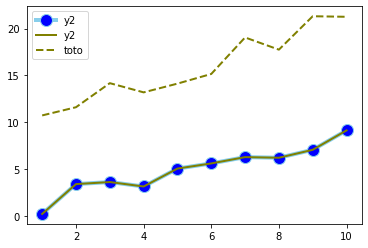

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': nov_backend, 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'x', 'y2', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


In [110]:
print(jan_goed.count("security"))

3


In [5]:
remove_punctuations = str.maketrans('', '', string.punctuation)
remove_digits = str.maketrans('', '', string.digits)
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
lemmatizer = WordNetLemmatizer()


vacature_description = []
divided_sentense_vacature_list = []

 

#Het splitten van beschrijvingen van alle vacatures
for vacature in mei_execute:
    for zin in vacature:
        without_stopwords = remove_stopwords(zin)
        sentences = without_stopwords.split('.')
        for sentence in sentences:
            vacature_description.append(sentence.translate(remove_punctuations).translate(remove_digits).lower())

#Het zeten vna elke sentence in een list
for divided_sentence in vacature_description:
    divided = divided_sentence.split()
    new_divided = []
    for divided_word in divided:
        lemmatized_words = lemmatizer.lemmatize(divided_word, get_part_of_speech(divided_word))
        new_divided.append(lemmatized_words)
    divided_sentense_vacature_list.append(new_divided)